In [1]:
import numpy as np
import pandas as pd
from comment_analysis import *

In [10]:
df = pd.read_csv('./data/listings_am_detailed.csv', header=0)
dfSUM = pd.read_csv('./data/listings_am_sum.csv', header=0)
dfCAL = pd.read_csv('./data/calendar_am.csv', header=0)

print('INPUT DATA SET:')
display(df.head())

INPUT DATA SET:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190914033014,2019-09-14,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
1,20168,https://www.airbnb.com/rooms/20168,20190914033014,2019-09-14,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.48
2,25428,https://www.airbnb.com/rooms/25428,20190914033014,2019-09-14,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20190914033014,2019-09-14,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20190914033014,2019-09-14,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.67


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,269,2019-09-03,2.11,1,70
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,288,2019-08-28,2.48,2,167
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.15,2,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,200,2019-09-12,2.14,1,264
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,295,2019-09-10,2.67,3,123


In [39]:
df[['reviews_per_month']].values.tolist()

[[2.11],
 [2.48],
 [0.15],
 [2.14],
 [2.67],
 [4.31],
 [0.32],
 [4.19],
 [23.99],
 [0.56],
 [0.33],
 [0.03],
 [1.66],
 [1.96],
 [3.12],
 [1.01],
 [0.23],
 [1.19],
 [2.47],
 [1.52],
 [0.86],
 [3.21],
 [2.91],
 [2.86],
 [1.61],
 [0.29],
 [0.06],
 [0.51],
 [1.45],
 [0.88],
 [0.01],
 [1.17],
 [0.25],
 [nan],
 [1.4],
 [0.26],
 [0.22],
 [6.29],
 [5.51],
 [1.47],
 [2.12],
 [0.6],
 [1.23],
 [2.19],
 [2.87],
 [1.38],
 [1.93],
 [7.83],
 [1.27],
 [7.11],
 [1.46],
 [0.83],
 [0.29],
 [2.73],
 [1.73],
 [0.5],
 [0.34],
 [0.8],
 [0.1],
 [3.98],
 [5.21],
 [0.23],
 [1.53],
 [0.3],
 [1.0],
 [0.85],
 [0.36],
 [5.9],
 [5.37],
 [0.66],
 [0.61],
 [2.55],
 [0.21],
 [1.04],
 [0.47],
 [1.37],
 [1.04],
 [0.27],
 [0.16],
 [2.01],
 [3.51],
 [0.12],
 [1.72],
 [0.12],
 [0.08],
 [5.64],
 [0.39],
 [0.43],
 [0.39],
 [0.26],
 [0.04],
 [0.2],
 [1.65],
 [0.25],
 [0.03],
 [0.2],
 [2.05],
 [1.3],
 [0.94],
 [0.18],
 [0.04],
 [1.4],
 [0.83],
 [3.48],
 [0.39],
 [1.63],
 [0.1],
 [4.24],
 [0.91],
 [1.4],
 [0.6],
 [0.68],
 [0.09]

In [12]:
dfSUM.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [17]:
dfCAL.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,148132,2019-09-14,f,$38.00,$38.00,2.0,7.0
1,148132,2019-09-15,f,$37.00,$37.00,2.0,7.0
2,148132,2019-09-16,f,$37.00,$37.00,2.0,7.0
3,148132,2019-09-17,f,$37.00,$37.00,2.0,7.0
4,148132,2019-09-18,f,$37.00,$37.00,2.0,7.0


In [35]:
max(df[['number_of_reviews']].values.tolist())

[786]

In [18]:
dfREV = pd.read_csv('./data/reviews_am_detailed.csv', header=0)

In [20]:
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


By taking a look at the columns of this dataframe, it appears that some columns would intuitively be more suited than others to be chosen as success metrics.

These columns are:
- 'review_scores_rating'
- 'review_scores_accuracy'
- 'review_scores_cleanliness'
- 'review_scores_checkin'
- 'review_scores_communication'
- 'review_scores_location'
- 'review_scores_value'
- 'availability_365'

As it turns out, the 'review_scores_rating' values are calculated as weighted sum of the other 'review_scores_...'.
We can thus consider that all the other scores are taken into account in this one, such that it is necessary only for this metric to be kept.

Therefore, the remaining columns are:
- 'review_scores_rating'
- 'availability_365'

Moreover, an other important quantity can be used as a measure of a listing's succes: the positive/negative sentiment of the comments left by the reveviewers.

Success can thus be defined by the 3 following metrics:
- 'review_scores_rating'
- 'availability_365'
- 'comment_sentiment'

In [4]:
#check if listing ids are duplicated 
print('There are: ' + str(df.duplicated('id', keep = False).sum()) + ' duplicated listing ids')

#check if listing ids are Nan or empty values
print('There are : ' + str(df['id'].isna().sum()) + ' Nan values under id')
print('There are : ' + str(df.id.loc[df['id'] == ''].sum()) + ' empty values under id')

There are: 0 duplicated listing ids
There are : 0 Nan values under id
There are : 0 empty values under id


/Users/laurine/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


This data contains 484507 lines.


/Users/laurine/Documents/MA-3/ADA/Project/airbnb_ada_project/comment_analysis.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['isSpace'] = comments['comments'].apply(lambda x: x.isspace())
/Users/laurine/Documents/MA-3/ADA/Project/airbnb_ada_project/comment_analysis.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_en['ap_comments'] = comments_en['comments'].apply(lambda x: regex2.sub(' ', x))


There are 17588 different housings in this city.


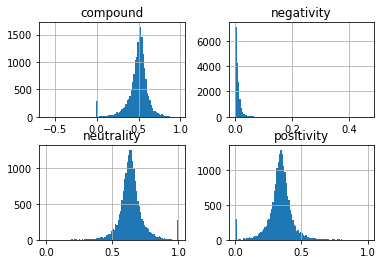

In [5]:
#add comment sentiment feature

#load comment data
comments = pd.read_csv('../data/2019-09-14_Amsterdam_reviews.csv', header=0)

#analyze comment data for each listing
comments, comments_en, comments_en_copy = analyze_comments(comments)
comments_en_copy.drop(columns = ['neutrality', 'compound'], inplace = True)


In [7]:
comments_en_copy.head()

,negativity,positivity
listing_id,,
2818,0.008322,0.305183
20168,0.017532,0.314667
25428,0.000000,0.224000
27886,0.012159,0.362951
28871,0.008385,0.372960


In [12]:
#define a dataframe for success metrics
df_success_metrics = pd.merge(df[['id', 'review_scores_rating', 'availability_365']],
                 comments_en_copy, left_on='id', right_on='listing_id')

df_success_metrics.head()

100.0


,id,review_scores_rating,availability_365,negativity,positivity
0,2818,98.0,70,0.008322,0.305183
1,20168,88.0,167,0.017532,0.314667
2,25428,100.0,58,0.000000,0.224000
3,27886,99.0,264,0.012159,0.362951
4,28871,97.0,123,0.008385,0.372960


In [14]:
print('The metric review_scores_rating is in the range: ['+ str(df_success_metrics.review_scores_rating.min())+', '+str(df_success_metrics.review_scores_rating.max())+']')
print('The metric availability_365 is in the range: ['+ str(df_success_metrics.availability_365.min())+', '+str(df_success_metrics.availability_365.max())+']')
print('The metric negativity is in the range: ['+ str(df_success_metrics.negativity.min())+', '+str(df_success_metrics.negativity.max())+']')
print('The metric positivity is in the range: ['+ str(df_success_metrics.positivity.min())+', '+str(df_success_metrics.positivity.max())+']')



The metric review_scores_rating is in the range: [20.0, 100.0]
The metric availability_365 is in the range: [0, 365]
The metric negativity is in the range: [0.0, 0.466]
The metric positivity is in the range: [0.0, 1.0]


In [38]:
#scores_types = ['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value', 'availability_365']
#success_metrics = ['review_scores_value', 'availability_365', 'comment_sentiment']

#df_success_metrics = df[success_metrics]

#check for Nan values in each metric
for col in df_success_metrics:
    print('There are : ' + str(df_success_metrics[col].isna().sum()) + ' Nan values under ' + col)

print('')

c = (df_success_metrics == '').sum(axis=0)
#check for empty values in each metric
for col in df_success_metrics:
    print('There are : ' + str(c[col]) + ' empty values under ' + col)

There are : 0 Nan values under id
There are : 224 Nan values under review_scores_rating
There are : 0 Nan values under availability_365
There are : 0 Nan values under negativity
There are : 0 Nan values under positivity

There are : 0 empty values under id
There are : 0 empty values under review_scores_rating
There are : 0 empty values under availability_365
There are : 0 empty values under negativity
There are : 0 empty values under positivity


In [39]:
#drop rows with Nan values
df_success_metrics.dropna(axis = 0, inplace = True)
df_success_metrics

,id,review_scores_rating,availability_365,negativity,positivity
0,2818,98.0,70,0.008322,0.305183
1,20168,88.0,167,0.017532,0.314667
2,25428,100.0,58,0.000000,0.224000
3,27886,99.0,264,0.012159,0.362951
4,28871,97.0,123,0.008385,0.372960
...,...,...,...,...,...
17574,38144285,100.0,315,0.000000,0.388143
17577,38182173,100.0,114,0.000000,0.377250
17578,38258178,93.0,4,0.021444,0.362222
17579,38339642,100.0,8,0.000000,0.286333


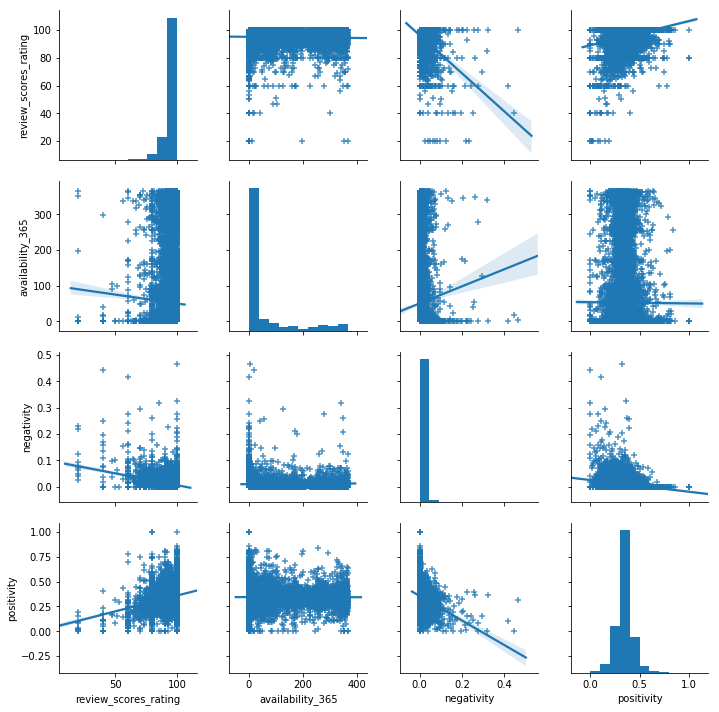

In [49]:

import seaborn as sns

sns.pairplot(df_success_metrics[['review_scores_rating', 'availability_365', 'negativity', 'positivity']], kind="reg", markers="+" )


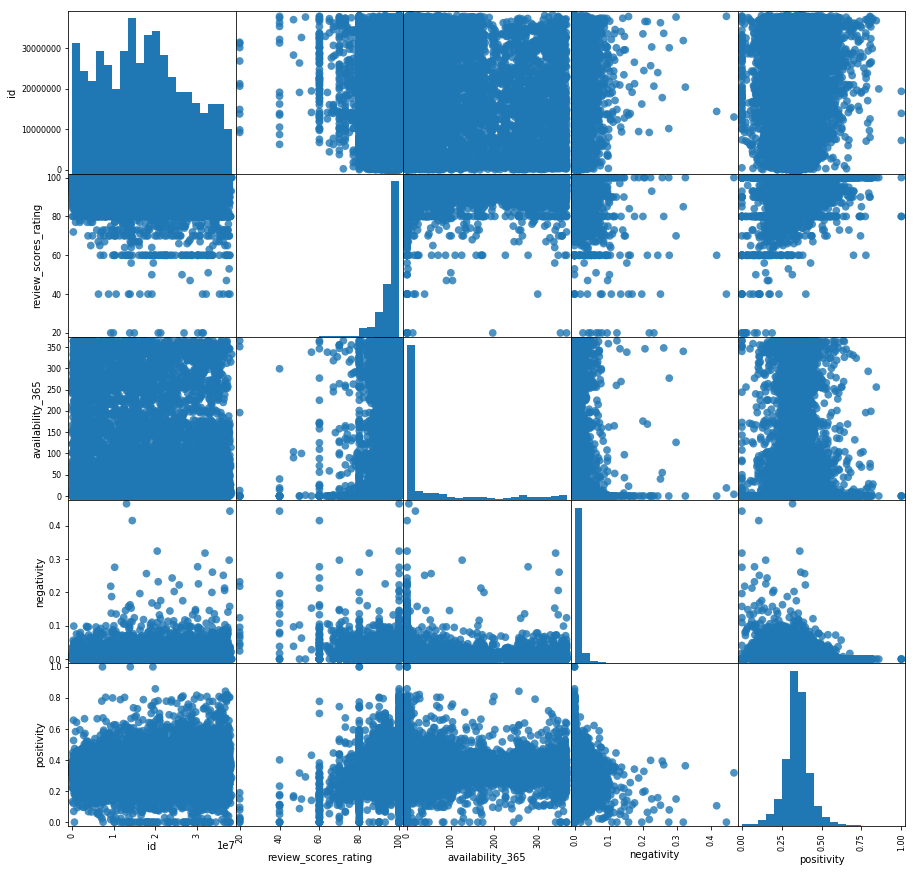

In [50]:
from sklearn import datasets


grr = pd.plotting.scatter_matrix(df_success_metrics, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [ ]:
import os
import pydot
import folium
import pydotplus
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.graph_objects as go
from folium.plugins import MiniMap
from IPython.core.display import display
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter as ti, utils
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [ ]:
from feature_tools import *